#**Índicador: INSE - 2019 - Nível Socioeconômico por escolas - 2020**
**Link dos Dados de origem:**<br>
https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/indicadores-educacionais/nivel-socioeconomico
<br>
Responsável: Gustavo de Andrade - gustavo.andrade@prefeitura.sp.gov.br

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime, date, timedelta

In [3]:
dados = pd.read_excel("INSE_2019_ESCOLAS.xlsx")

In [4]:
dados

,CO_ESCOLA,NOME_ESCOLA,CO_UF,NOME_UF,CO_MUNICIPIO,NOME_MUNICIPIO,ID_AREA,TP_DEPENDENCIA,TP_LOCALIZACAO,QTD_ALUNOS_INSE,INSE_VALOR_ABSOLUTO,INSE_CLASSIFICACAO,PC_NIVEL_1,PC_NIVEL_2,PC_NIVEL_3,PC_NIVEL_4,PC_NIVEL_5,PC_NIVEL_6,PC_NIVEL_7,PC_NIVEL_8
0,11024666,EMEIEF BOA ESPERANCA,11,Rondônia,1100015,Alta Floresta D'Oeste,2,3,2,30,4.54,Nível IV,0.00,16.67,33.33,33.33,13.61,3.06,0.00,0.00
1,11024682,EEEF EURIDICE LOPES PEDROSO,11,Rondônia,1100015,Alta Floresta D'Oeste,2,2,1,147,4.96,Nível IV,0.00,15.67,16.69,22.32,17.46,15.67,10.05,2.14
2,11024828,EMEIEF IZIDORO STEDILE,11,Rondônia,1100015,Alta Floresta D'Oeste,2,3,1,30,4.87,Nível IV,0.00,3.39,26.48,33.37,23.34,10.04,3.39,0.00
3,11024968,EEEMTI JUSCELINO KUBITSCHEK DE OLIVEIRA,11,Rondônia,1100015,Alta Floresta D'Oeste,2,2,1,66,4.78,Nível IV,0.00,10.60,27.12,27.13,18.16,10.58,6.42,0.00
4,11025077,EMEIEF MARIA DE SOUZA PEGO,11,Rondônia,1100015,Alta Floresta D'Oeste,2,3,1,21,4.60,Nível IV,0.00,23.66,32.28,15.04,15.04,4.31,9.67,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68863,53068190,EC 01 DO PORTO RICO,53,Distrito Federal,5300108,Brasília,1,2,1,58,4.74,Nível IV,0.00,10.23,29.47,29.31,17.34,12.00,1.66,0.00
68864,53068203,EC 02 DO ITAPOA,53,Distrito Federal,5300108,Brasília,1,2,1,98,4.95,Nível IV,0.00,8.92,15.11,32.40,24.11,13.22,4.20,2.04
68865,53068211,CEF MIGUEL ARCANJO,53,Distrito Federal,5300108,Brasília,1,2,1,228,5.12,Nível V,0.00,6.49,13.53,25.75,24.41,15.78,14.03,0.00
68866,53068220,EC DOM BOSCO,53,Distrito Federal,5300108,Brasília,1,2,1,113,5.06,Nível V,0.00,7.82,16.52,27.63,20.29,17.14,9.75,0.85


Legenda das colunas:

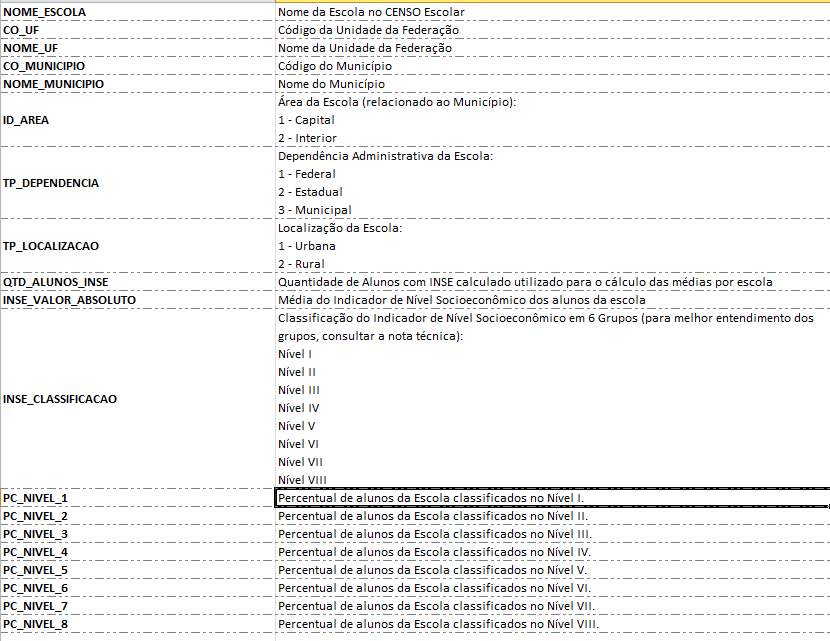

Filtrando - 'CO_MUNICIPIO' = 3550308 -> São Paulo

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68868 entries, 0 to 68867
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CO_ESCOLA            68868 non-null  int64  
 1   NOME_ESCOLA          68868 non-null  object 
 2   CO_UF                68868 non-null  int64  
 3   NOME_UF              68868 non-null  object 
 4   CO_MUNICIPIO         68868 non-null  int64  
 5   NOME_MUNICIPIO       68868 non-null  object 
 6   ID_AREA              68868 non-null  int64  
 7   TP_DEPENDENCIA       68868 non-null  int64  
 8   TP_LOCALIZACAO       68868 non-null  int64  
 9   QTD_ALUNOS_INSE      68868 non-null  int64  
 10  INSE_VALOR_ABSOLUTO  68868 non-null  float64
 11  INSE_CLASSIFICACAO   68868 non-null  object 
 12  PC_NIVEL_1           68868 non-null  float64
 13  PC_NIVEL_2           68868 non-null  float64
 14  PC_NIVEL_3           68868 non-null  float64
 15  PC_NIVEL_4           68868 non-null 

In [8]:
inse = dados.loc[lambda dados: dados["NOME_MUNICIPIO"] == "São Paulo"]
inse

,CO_ESCOLA,NOME_ESCOLA,CO_UF,NOME_UF,CO_MUNICIPIO,NOME_MUNICIPIO,ID_AREA,TP_DEPENDENCIA,TP_LOCALIZACAO,QTD_ALUNOS_INSE,INSE_VALOR_ABSOLUTO,INSE_CLASSIFICACAO,PC_NIVEL_1,PC_NIVEL_2,PC_NIVEL_3,PC_NIVEL_4,PC_NIVEL_5,PC_NIVEL_6,PC_NIVEL_7,PC_NIVEL_8
50892,35000012,AYRES DE MOURA PROFESSOR,35,São Paulo,3550308,São Paulo,1,2,1,129,5.46,Nível V,0.00,0.75,7.75,21.07,22.47,24.87,21.61,1.49
50893,35000024,GAVIAO PEIXOTO BRIGADEIRO,35,São Paulo,3550308,São Paulo,1,2,1,461,5.01,Nível V,0.45,10.13,13.44,25.09,23.34,18.21,7.93,1.41
50894,35000036,JOAO SOLIMEO,35,São Paulo,3550308,São Paulo,1,2,1,525,5.10,Nível V,1.03,5.21,13.26,26.92,22.71,18.88,11.39,0.60
50895,35000048,WALFREDO ARANTES CALDAS PROFESSOR,35,São Paulo,3550308,São Paulo,1,2,1,286,4.89,Nível IV,1.45,10.41,17.80,26.00,23.96,13.83,5.16,1.39
50896,35000059,SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR,35,São Paulo,3550308,São Paulo,1,2,1,222,4.95,Nível IV,0.00,12.36,20.01,19.85,20.06,19.93,7.02,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52561,35925949,DOM AGNELO CARDEAL ROSSI,35,São Paulo,3550308,São Paulo,1,2,1,199,4.96,Nível IV,0.65,8.63,14.66,27.22,24.82,17.53,6.50,0.00
52562,35925998,ADELAIDE ROSA FERNANDES MACHADO DE SOUZA PROFE...,35,São Paulo,3550308,São Paulo,1,2,1,15,4.77,Nível IV,0.00,13.33,26.67,26.67,20.00,13.33,0.00,0.00
52563,35926048,BARRO BRANCO II,35,São Paulo,3550308,São Paulo,1,2,1,311,5.02,Nível V,0.38,5.17,22.05,24.45,21.61,14.46,11.59,0.30
52564,35926103,PROFESSORA ELIANA PASSUELO,35,São Paulo,3550308,São Paulo,1,2,1,74,5.03,Nível V,0.00,5.39,17.56,21.83,26.83,23.06,5.33,0.00


In [9]:
len(inse)

1674

#**Modelando a tabela**

Limpando colunas desnecessárias:

In [11]:
inse.drop(columns =['CO_UF','NOME_UF','CO_MUNICIPIO','NOME_MUNICIPIO'], inplace = True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
inse.drop(columns =['ID_AREA'], inplace = True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
len(inse)

1674

Renomeando colunas

In [22]:
inse = inse.rename(columns = {'QTD_ALUNOS_INSE':'qtd_total_alunos', 'INSE_VALOR_ABSOLUTO':'inse_valor_absoluto','INSE_CLASSIFICACAO':'inse_classificacao'}, inplace = False)

In [25]:
inse = inse.rename(columns = {'QTD_ALUNOS_INSE':'qtd_total_alunos', 'INSE_VALOR_ABSOLUTO':'inse_valor_absoluto','INSE_CLASSIFICACAO':'inse_classificacao'}, inplace = False)

In [24]:
inse = inse.rename(columns = {'PC_NIVEL_1':'percentual_nivel_1', 'PC_NIVEL_2':'percentual_nivel_2', 'PC_NIVEL_3':'percentual_nivel_3', 'PC_NIVEL_4':'percentual_nivel_4','PC_NIVEL_5':'percentual_nivel_5','PC_NIVEL_6':'percentual_nivel_6', 'PC_NIVEL_7':'percentual_nivel_7','PC_NIVEL_8':'percentual_nivel_8' }, inplace = False)

In [27]:
inse

,id_escola,escola,tipo_escola,tipo_area,qtd_total_alunos,inse_valor_absoluto,inse_classificacao,percentual_nivel_1,percentual_nivel_2,percentual_nivel_3,percentual_nivel_4,percentual_nivel_5,percentual_nivel_6,percentual_nivel_7,percentual_nivel_8
50892,35000012,AYRES DE MOURA PROFESSOR,2,1,129,5.46,Nível V,0.00,0.75,7.75,21.07,22.47,24.87,21.61,1.49
50893,35000024,GAVIAO PEIXOTO BRIGADEIRO,2,1,461,5.01,Nível V,0.45,10.13,13.44,25.09,23.34,18.21,7.93,1.41
50894,35000036,JOAO SOLIMEO,2,1,525,5.10,Nível V,1.03,5.21,13.26,26.92,22.71,18.88,11.39,0.60
50895,35000048,WALFREDO ARANTES CALDAS PROFESSOR,2,1,286,4.89,Nível IV,1.45,10.41,17.80,26.00,23.96,13.83,5.16,1.39
50896,35000059,SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR,2,1,222,4.95,Nível IV,0.00,12.36,20.01,19.85,20.06,19.93,7.02,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52561,35925949,DOM AGNELO CARDEAL ROSSI,2,1,199,4.96,Nível IV,0.65,8.63,14.66,27.22,24.82,17.53,6.50,0.00
52562,35925998,ADELAIDE ROSA FERNANDES MACHADO DE SOUZA PROFE...,2,1,15,4.77,Nível IV,0.00,13.33,26.67,26.67,20.00,13.33,0.00,0.00
52563,35926048,BARRO BRANCO II,2,1,311,5.02,Nível V,0.38,5.17,22.05,24.45,21.61,14.46,11.59,0.30
52564,35926103,PROFESSORA ELIANA PASSUELO,2,1,74,5.03,Nível V,0.00,5.39,17.56,21.83,26.83,23.06,5.33,0.00


#**Tabela Dimensioanl: inse_escolas_dim**

In [28]:
inse_escolas_dim = pd.DataFrame()
inse_escolas_dim['escola'] = inse['escola']
inse_escolas_dim['id_escola'] = inse['id_escola']

In [29]:
inse_escolas_dim

,escola,id_escola
50892,AYRES DE MOURA PROFESSOR,35000012
50893,GAVIAO PEIXOTO BRIGADEIRO,35000024
50894,JOAO SOLIMEO,35000036
50895,WALFREDO ARANTES CALDAS PROFESSOR,35000048
50896,SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR,35000059
...,...,...
52561,DOM AGNELO CARDEAL ROSSI,35925949
52562,ADELAIDE ROSA FERNANDES MACHADO DE SOUZA PROFE...,35925998
52563,BARRO BRANCO II,35926048
52564,PROFESSORA ELIANA PASSUELO,35926103


In [30]:
inse_escolas_dim.to_csv(r'inse_escolas_dim', index = False)

#**Concluindo a Fato: inse_fato**

In [31]:
inse.drop(columns =['escola'], inplace = True) 

In [32]:
inse

,id_escola,tipo_escola,tipo_area,qtd_total_alunos,inse_valor_absoluto,inse_classificacao,percentual_nivel_1,percentual_nivel_2,percentual_nivel_3,percentual_nivel_4,percentual_nivel_5,percentual_nivel_6,percentual_nivel_7,percentual_nivel_8
50892,35000012,2,1,129,5.46,Nível V,0.00,0.75,7.75,21.07,22.47,24.87,21.61,1.49
50893,35000024,2,1,461,5.01,Nível V,0.45,10.13,13.44,25.09,23.34,18.21,7.93,1.41
50894,35000036,2,1,525,5.10,Nível V,1.03,5.21,13.26,26.92,22.71,18.88,11.39,0.60
50895,35000048,2,1,286,4.89,Nível IV,1.45,10.41,17.80,26.00,23.96,13.83,5.16,1.39
50896,35000059,2,1,222,4.95,Nível IV,0.00,12.36,20.01,19.85,20.06,19.93,7.02,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52561,35925949,2,1,199,4.96,Nível IV,0.65,8.63,14.66,27.22,24.82,17.53,6.50,0.00
52562,35925998,2,1,15,4.77,Nível IV,0.00,13.33,26.67,26.67,20.00,13.33,0.00,0.00
52563,35926048,2,1,311,5.02,Nível V,0.38,5.17,22.05,24.45,21.61,14.46,11.59,0.30
52564,35926103,2,1,74,5.03,Nível V,0.00,5.39,17.56,21.83,26.83,23.06,5.33,0.00


In [33]:
inse.to_csv(r'inse_fato', index = False)